In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import random
from tqdm import tqdm
import cv2

In [2]:
data = scipy.io.loadmat('ex7data1.mat')

In [3]:
X = np.array(data['X'])
x1, x2 = X[:,0], X[:,1]

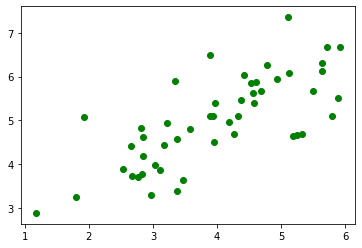

In [5]:
plt.scatter(x1, x2 , color='green')

In [6]:
#2 Dimension
class k_mean:

    def __init__(self, K, max_itter = 100):
        self.k = K
        self.max_itter = max_itter
        
    def def_center(self, x):
#         return np.random.randint((self.k, np.shape(x)[1]))
        np.random.seed(len(x))
        return np.random.randint(np.min(x) , np.max(x) , size=(self.k, np.shape(x)[1]))
    
    def new_def_center(self, X, clu):
        clu = pd.DataFrame(clu, columns = ['clu'])
        new_df = pd.concat([pd.DataFrame(X) , clu] , axis = 1)
        new_centroid = []
        for i in range(self.k):
            temp = (np.mean(new_df[new_df['clu'] == i] , axis = 0))
            new_centroid.append(np.array(temp[:-1]))
        return new_centroid

    def find_distance(self, centers, points):
        result = []
        for i in range(len(centers)):
            result.append(np.linalg.norm(centers[i] - points, axis = 1))
        return np.array(result)

    def define_cluster(self, distances):
        result = []
        dis = np.min((np.array(distances).T), axis = 1)
        for i in range(len(dis)):
            index = dis[i]
            clus = distances.T.tolist()[i].index(index)
            result.append(clus)
        return result
    
    def model(self, x):
        """
        x size = n * m ;m=features & n = no data
        k = no. of clusters
        """
        it = self.max_itter
        
        #init random center
        #shape = (k,m)
        centers = self.def_center(x)
        path = []
        for i in tqdm(range(it)):
            dis = self.find_distance(centers , x)
            cluster = self.define_cluster(dis)
            centers = self.new_def_center(x, cluster)
            path.append(centers)
        return cluster , centers, path

In [25]:
obj = k_mean(4, 100)
clusters, centers, path = obj.model(X)

100%|██████████| 100/100 [00:00<00:00, 106.00it/s]


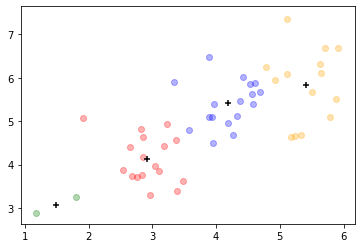

In [26]:
new_data = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters)] ,axis =1)

new_data.columns=['x','y','c']

a_x = new_data[new_data['c'] == 0]['x'] , new_data[new_data['c'] == 0]['y']
a_y = new_data[new_data['c'] == 1]['x'] , new_data[new_data['c'] == 1]['y']
a_z = new_data[new_data['c'] == 2]['x'] , new_data[new_data['c'] == 2]['y']
a_w = new_data[new_data['c'] == 3]['x'] , new_data[new_data['c'] == 3]['y']

plt.scatter(np.array(a_x[0]), np.array(a_x[1]), color='green',alpha=0.3)
plt.scatter(np.array(a_y[0]), np.array(a_y[1]), color='blue', alpha=0.3)
plt.scatter(np.array(a_z[0]), np.array(a_z[1]), color='red' , alpha=0.3)
plt.scatter(np.array(a_w[0]), np.array(a_w[1]), color='orange' , alpha=0.3)

plt.scatter(centers[0][0] , centers[0][1],color='black',marker='+')
plt.scatter(centers[1][0] , centers[1][1],color='black',marker='+')
plt.scatter(centers[2][0] , centers[2][1],color='black',marker='+')
plt.scatter(centers[3][0] , centers[3][1],color='black',marker='+')

In [27]:
image = cv2.imread('G:\movie\image\SAM_3805.jpg',0)
new_image = cv2.resize(image, (960, 540))
# obj = k_mean(K=4)
a = obj.model(new_image)
np.shape(new_image)

100%|██████████| 100/100 [00:11<00:00,  8.93it/s]


(540, 960)

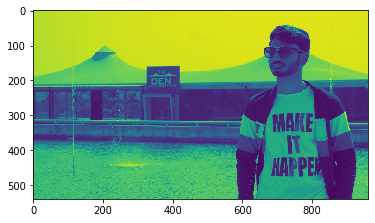

In [28]:
plt.imshow(new_image)

In [29]:
# new_data = pd.concat([pd.DataFrame(new_image), pd.DataFrame(a[0])] ,axis =1)
# new_data.columns=['x','y','c']
# a_x = new_data[new_data['c'] == 0]['x'] , new_data[new_data['c'] == 0]['y']
# a_y = new_data[new_data['c'] == 1]['x'] , new_data[new_data['c'] == 1]['y']
# a_z = new_data[new_data['c'] == 2]['x'] , new_data[new_data['c'] == 2]['y']
# temp = new_data

In [30]:
new_data = pd.concat([pd.DataFrame(new_image), pd.DataFrame(a[0])] ,axis =1)
new_data.columns = np.linspace(1,961,961)

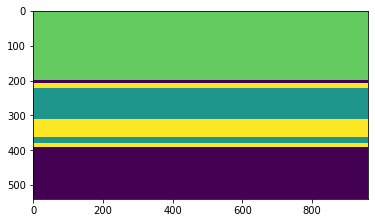

In [31]:
c_0 = new_data[new_data[961] == 0]*0 + 200
c_1 = new_data[new_data[961] == 1]*0 + 2200
c_2 = new_data[new_data[961] == 2]*0 + 3100
c_3 = new_data[new_data[961] == 3]*0 + 4020

s_image_h = pd.concat([c_0, c_1, c_2, c_3],axis = 0)
plt.figure()
plt.imshow(s_image_h.T[np.sort(s_image_h.index)].T)#, plt.imshow(new_data)

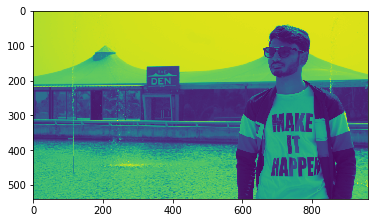

In [32]:
plt.imshow(new_data)

In [129]:
# temp.transpose()[c_1.transpose().columns] = temp.transpose()[c_1.transpose().columns] * 0 + np.mean(c_0)
# temp.transpose()[c_0.transpose().columns] = temp.transpose()[c_0.transpose().columns] * 0 + np.mean(c_0)
# temp.transpose()[c_0.transpose().columns] = temp.transpose()[c_0.transpose().columns] * 0 + np.mean(c_0)
# temp.transpose()[c_0.transpose().columns] = temp.transpose()[c_0.transpose().columns] * 0 + np.mean(c_0)

In [14]:
obj = k_mean(K=2,max_itter = 100)
a = obj.model(new_image.T)

100%|██████████| 100/100 [00:31<00:00,  3.20it/s]


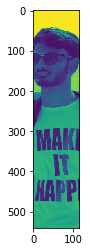

In [15]:
image1 = pd.concat([pd.DataFrame(new_image.T), pd.DataFrame(a[0])] ,axis =1)
image1.columns = np.linspace(1,541,541)
c_0 = image1[image1[541] == 0]
c_1 = image1[image1[541] == 1]
# c_2 = image1[image1[541] == 2]
# c_3 = image1[image1[541] == 3]
s_image_h = pd.concat([c_0, c_1])
plt.imshow(s_image_h.T)
plt.imshow(c_0.T)

In [16]:
imagedata = cv2.imread('G:\movie\image\SAM_3733.jpg',0)
image = cv2.resize(imagedata , (960, 540))
np.shape(image)

(540, 960)

In [17]:
obj = k_mean(K=4, max_itter = 100)
a = obj.model(image.T)

100%|██████████| 100/100 [00:42<00:00,  2.36it/s]


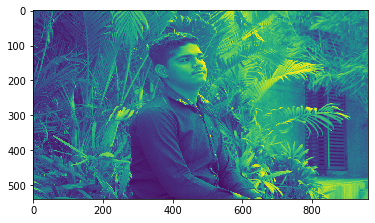

In [18]:
plt.imshow(image)

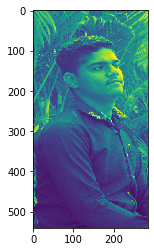

In [91]:
image2 = pd.concat([pd.DataFrame(image.T), pd.DataFrame(a[0])] ,axis =1)
image2.columns = np.linspace(1,541,541)
c_0 = image2[image2[541] == 0]
c_1 = image2[image2[541] == 1]
c_2 = image2[image2[541] == 2]
# c_3 = image2[image2[541] == 3]
s_image_h = pd.concat([c_0, c_1])
plt.imshow(image2.T)
plt.imshow(c_0.T)